In [28]:
import sys
sys.path.append("../Simulations/")

import numpy as np
import matplotlib.pyplot as plt
from tqdm import *
from scipy.integrate import nquad, quad
from scipy.interpolate import interp1d
from scipy.special import erf, jn, jv, kn
import mpmath as mp
from skmonaco import mcimport, mcquad, mcmiser

from units import *
from spec_calc import PowerSpectra, PowerSpectraPopulations

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pspec = PowerSpectra(precompute=['NFW', 'Burk'])

Loading Burkert parameters
Loading NFW parameters


# Single subhalo

In [3]:
l_min = 1
l_max = 500
n_l = 50
l_ary = np.logspace(np.log10(l_min), np.log10(l_max), n_l)

In [4]:
M0 = 10**8*M_s
R0 = pspec.R0_VL(M0)
Dl = 10*kpc
v = 1e-3

In [5]:
Cl_NFW_ary = np.array([pspec.Cl_NFW(M0, Dl, v, l) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_Burk_ary = np.array([pspec.Cl_Burk(M0, Dl, v, l) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_tNFW_ary = np.array([pspec.Cl_tNFW(M0, Dl, v, l, tau=15) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_tNFW2_ary = np.array([pspec.Cl_tNFW(M0, Dl, v, l, tau=10) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2

In [6]:
Cl_Plummer_ary = pspec.Cl_Plummer(R0, M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;
Cl_Gauss_ary = pspec.Cl_Gauss(R0, M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;
Cl_Point_ary = pspec.Cl_Point(M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;

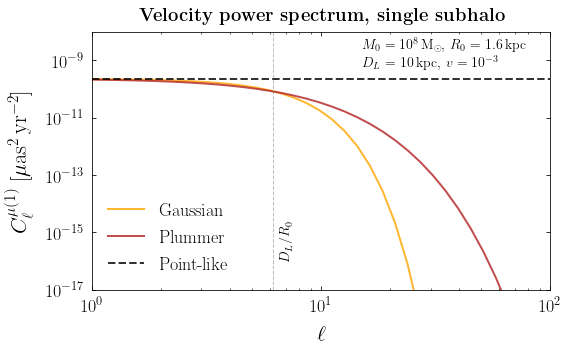

In [156]:
plt.figure(figsize=(8,5))

plt.plot(l_ary, Cl_Gauss_ary, label="Gaussian", alpha=0.8, c='orange')
plt.plot(l_ary, Cl_Plummer_ary, label="Plummer", alpha=0.8, color='firebrick')
plt.plot(l_ary, len(l_ary)*[Cl_Point_ary], label="Point-like", c='k', ls='--', alpha=0.8)

plt.axvline((1/(R0/Dl)), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(R0/Dl)) + .5,1e-15,'$D_L/R_0$',rotation=90, fontsize=14)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\mu (1)}$ [$\mu$as$^2$\,yr$^{-2}$]")


plt.xlim(l_min, 100)
plt.ylim(1e-17,1e-8)

plt.title('\\textbf{Velocity power spectrum, single subhalo}', fontsize=18.5, y=1.02)
plt.text(15, 2.3e-9,'$M_0 = 10^8\,$M$_\odot$, $R_0$ = ' + str(R0/kpc)[:3] + '\,kpc', fontsize=14)
plt.text(15, 5e-10,'$D_L$ = 10\,kpc, $v=10^{-3}$', fontsize=14)


plt.legend(frameon=False)

plt.tight_layout()
plt.savefig("plots/mu_single_1.pdf")

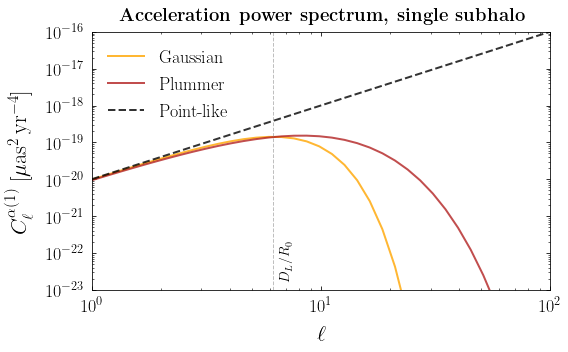

In [155]:
pref = (3/64)*l_ary**2/Dl**2/(1/Year**2)

plt.figure(figsize=(8,5)
          )
plt.plot(l_ary, pref*Cl_Gauss_ary, label="Gaussian", alpha=0.8, c='orange')
plt.plot(l_ary, pref*Cl_Plummer_ary, label="Plummer", alpha=0.8, color='firebrick')
plt.plot(l_ary, pref*np.array(len(l_ary)*[Cl_Point_ary]), label="Point-like", c='k', ls='--', alpha=0.8)

plt.axvline((1/(R0/Dl)), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(R0/Dl)) + .5,1e-22,'$D_L/R_0$',rotation=90, fontsize=14)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\\alpha (1)}$ [$\mu$as$^2$\,yr$^{-4}$]")


plt.xlim(l_min, 100)
plt.ylim(1e-23,1e-16)

plt.title('\\textbf{Acceleration power spectrum, single subhalo}', fontsize=18.5, y=1.02)

plt.legend(frameon=False)

plt.tight_layout()
plt.savefig("plots/alpha_single_1.pdf")

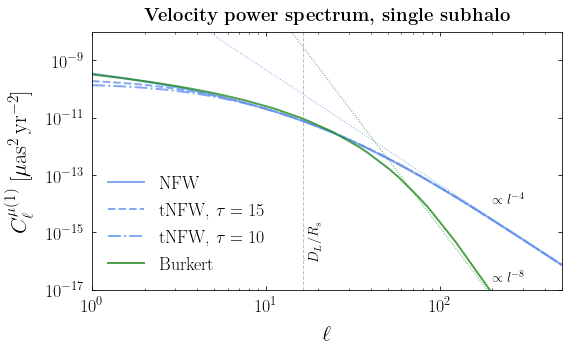

In [154]:
plt.figure(figsize=(8,5))

plt.plot(l_ary, Cl_NFW_ary, label="NFW", alpha=0.8, c='cornflowerblue')
plt.plot(l_ary, Cl_tNFW_ary, label="tNFW, $\\tau = 15$", alpha=0.8, ls='--', c='cornflowerblue')
plt.plot(l_ary, Cl_tNFW2_ary, label="tNFW, $\\tau = 10$", alpha=0.8, ls='-.', c='cornflowerblue')
plt.plot(l_ary, Cl_Burk_ary, label="Burkert", alpha=0.8,c='forestgreen')

n = 4
plt.plot(l_ary, (1/l_ary**n)*Cl_NFW_ary[-1]/(1/(l_ary**n)[-1]), lw=1, alpha=0.8, ls='dotted', c='cornflowerblue')

n = 8
l_base = 2000
fac = pspec.Cl_Burk(M0, Dl, v, l_base)/(1e-6*asctorad/Year)**2/(1/(l_base**n))
plt.plot(l_ary, (1/l_ary**n)*fac, lw=1, alpha=0.8, ls='dotted',c='forestgreen')

plt.text(200, 1e-14,'$\propto l^{-4}$', fontsize=14)
plt.text(200, 2e-17,'$\propto l^{-8}$', fontsize=14)

plt.axvline(1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl)) + 1.5,1e-15,'$D_L/R_s$',rotation=90, fontsize=14)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\mu (1)}$ [$\mu$as$^2$\,yr$^{-2}$]")


plt.xlim(l_min, 500)
plt.ylim(1e-17,1e-8)

plt.title('\\textbf{Velocity power spectrum, single subhalo}', fontsize=18.5, y=1.02)

plt.legend(frameon=False)

plt.tight_layout()
plt.savefig("plots/mu_single_2.pdf")

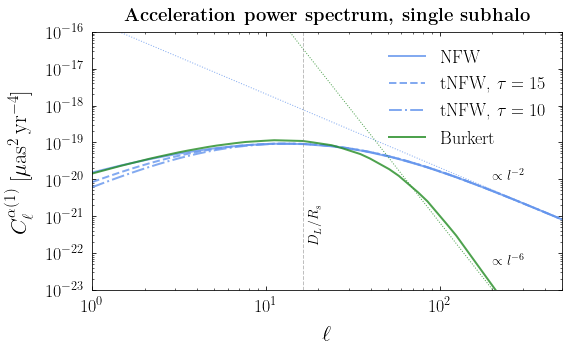

In [153]:
plt.figure(figsize=(8,5))

plt.plot(l_ary, pref*Cl_NFW_ary, label="NFW", alpha=0.8, c='cornflowerblue')
plt.plot(l_ary, pref*Cl_tNFW_ary, label="tNFW, $\\tau = 15$", alpha=0.8, ls='--', c='cornflowerblue')
plt.plot(l_ary, pref*Cl_tNFW2_ary, label="tNFW, $\\tau = 10$", alpha=0.8, ls='-.', c='cornflowerblue')
plt.plot(l_ary, pref*Cl_Burk_ary, label="Burkert", alpha=0.8,c='forestgreen')

n = 4 # is actually n + 2 
plt.plot(l_ary, (1/l_ary**n)*pref*Cl_NFW_ary[-1]/(1/(l_ary**n)[-1]), lw=1, alpha=0.8, ls='dotted', c='cornflowerblue')

n = 8 # is actually n + 2 
l_base = 2000
fac = pref*pspec.Cl_Burk(M0, Dl, v, l_base)/(1e-6*asctorad/Year)**2/(1/(l_base**n))
plt.plot(l_ary, (1/l_ary**n)*fac, lw=1, alpha=0.8, ls='dotted',c='forestgreen')

plt.text(200, 1e-20,'$\propto l^{-2}$', fontsize=14)
plt.text(200, 5e-23,'$\propto l^{-6}$', fontsize=14)

plt.axvline(1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl)) + 1.5,1e-21,'$D_L/R_s$',rotation=90, fontsize=14)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\\alpha (1)}$ [$\mu$as$^2$\,yr$^{-4}$]")


plt.xlim(l_min, 500)
plt.ylim(1e-23,1e-16)

plt.title('\\textbf{Acceleration power spectrum, single subhalo}', fontsize=18.5, y=1.02)

plt.legend(frameon=False)

plt.tight_layout()
plt.savefig("plots/alpha_single_2.pdf")

# Populations

In [183]:
pspecpop = PowerSpectraPopulations()

Loading Burkert parameters
Loading NFW parameters
Calculating velocity integrals


In [184]:
alpha_fid = -1.9
dalpha = 0.02

pspecpop.set_mass_distribution(pspecpop.rho_M_SI, f_DM=0.5, M_min=1e5*M_s, M_max=1e10*M_s, alpha=alpha_fid)
pspecpop.set_radial_distribution(pspecpop.r2rho_V_ein_EAQ, R_min=1*kpc, R_max=200*kpc)
pspecpop.set_subhalo_properties(pspecpop.c200_Moline)

pspecpop.get_C_l_total_ary()

C_l_fid_ary = pspecpop.C_l_ary

In [195]:
C_l_p_ary = []

pspecpop.set_mass_distribution(pspecpop.rho_M_SI, f_DM=0.5, M_min=1e5*M_s, M_max=1e10*M_s, alpha=alpha_fid + dalpha)
pspecpop.set_radial_distribution(pspecpop.r2rho_V_ein_EAQ, R_min=.1*kpc, R_max=260*kpc)
pspecpop.set_subhalo_properties(pspecpop.c200_Moline)

pspecpop.get_C_l_total_ary()

C_l_p_ary.append(pspecpop.C_l_ary)


In [196]:
C_l_m_ary = []

pspecpop.set_mass_distribution(pspecpop.rho_M_SI, f_DM=0.5, M_min=1e5*M_s, M_max=1e10*M_s, alpha=alpha_fid - dalpha)
pspecpop.set_radial_distribution(pspecpop.r2rho_V_ein_EAQ, R_min=1*kpc, R_max=200*kpc)
pspecpop.set_subhalo_properties(pspecpop.c200_Moline)

pspecpop.get_C_l_total_ary()

C_l_m_ary.append(pspecpop.C_l_ary)

In [197]:
sigma_mu = 1
sigma_alpha = .1
N_q = 1e9

(1e-10, 0.1)

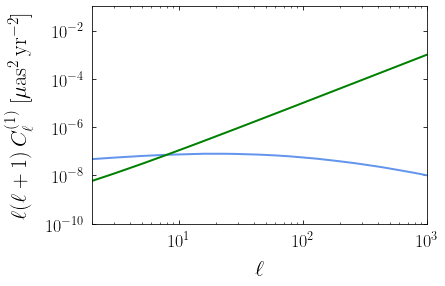

In [185]:
plt.plot(pspecpop.l_ary, pspecpop.l_ary*(pspecpop.l_ary + 1)*pspecpop.C_l_ary)
plt.plot(pspecpop.l_ary, pspecpop.l_ary*(pspecpop.l_ary + 1)*np.ones_like(pspecpop.l_ary)*sigma_mu**2/N_q, color='green')

# plt.plot(pspecpop.l_ary, pspecpop.l_ary*(pspecpop.l_ary + 1)*C_l_p_ary[0])
# plt.plot(pspecpop.l_ary, pspecpop.l_ary*(pspecpop.l_ary + 1)*C_l_m_ary[0])

# plt.plot(pspecpop.l_ary, pspecpop.l_ary*(pspecpop.l_ary + 1)*pspecpop.C_l_ary*(1+0.2))
# plt.plot(pspecpop.l_ary, pspecpop.l_ary*(pspecpop.l_ary + 1)*pspecpop.C_l_ary*(1-0.2))

plt.yscale("log")
plt.xscale("log")

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)\,C_\ell^{(1)}$ [$\mu$as$^2$\,yr$^{-2}$]")

plt.xlim(2, 1000)
plt.ylim(1e-10,1e-1)



# Fisher Forecasts

In [186]:
from astrometry_forecast import Parameter, AstrometryObservation, FisherForecast

In [187]:
sigma_mu = 1
sigma_alpha = .1
N_q = 1e9

In [189]:
fDM_base = 0.
dfDM_base = 0.001

p = C_l_fid_ary*((fDM_base + dfDM_base)/0.5)
m = C_l_fid_ary*((fDM_base - dfDM_base)/0.5)

(p - m)/(2*dfDM_base)

array([3.73571472e-08, 1.59074752e-08, 9.13569286e-09, ...,
       2.26391359e-15, 2.26026668e-15, 2.25662746e-15])

In [223]:
fDM_base = 0.0
dfDM_base = 0.2

p = C_l_fid_ary*((fDM_base + dfDM_base)/0.5)
m = C_l_fid_ary*((fDM_base - dfDM_base)/0.5)

fDM = Parameter('fDM', fDM_base ,dfDM_base , None, True, p, m, 
                None, None, '$\\f_\mathrm{DM}$' )

alpha = Parameter('alpha', alpha_fid ,dalpha , 0.1, True, C_l_p_ary[0], C_l_m_ary[0], 
                None, None, '$\alpha$' )

parameters = [fDM_base/0.5*C_l_fid_ary, None, 1, 2000, fDM, alpha]
observation = AstrometryObservation(fsky=1, sigma_mu=sigma_mu, sigma_alpha=None, N_q=N_q, l_min_mu=10, l_max_mu=2000, l_min_alpha=10, l_max_alpha=2000)

fshr = FisherForecast(parameters, observation)
lim = 1.64*np.sqrt(np.linalg.inv(fshr.fshr_cls + fshr.fshr_prior)[0,0])
print(lim)

0.2631210154278203
0.09999691318120897
0.43151846530162524


In [254]:
fDM_ary = np.linspace(0.001,3,100)
    
for fDM_base in tqdm_notebook(fDM_ary):
    dfDM_base = 0.0001


    fDM = Parameter('fDM', fDM_base ,dfDM_base , True, C_l_fid_ary*(fDM_base/0.5)*(1 + dfDM_base), C_l_fid_ary*(fDM_base/0.5)*(1 - dfDM_base), 
                    None, None, '$\\f_\mathrm{DM}$' )

    alpha = Parameter('alpha', alpha_fid ,dalpha , False, C_l_p_ary[0], C_l_m_ary[0], 
                    None, None, '$\alpha$' )

    parameters = [fDM_base/0.5*C_l_fid_ary, None, 1, 2000, fDM, alpha]
    observation = AstrometryObservation(fsky=1, sigma_mu=sigma_mu, sigma_alpha=None, N_q=N_q, l_min_mu=10, l_max_mu=2000, l_min_alpha=10, l_max_alpha=2000)

    fshr = FisherForecast(parameters, observation)
    lim = 1.64*np.sqrt(np.linalg.inv(fshr.fshr_cls)[0,0])
    print(lim)
    if fDM_base > (lim):
        print("limit is ", fDM_base)
        break

108.4940701746202
3.5927379878507453
1.8875638157321486
1.3056755850666135
1.0115750707742877
0.8337712597464798
0.7144698014431682
0.6287430173067663
0.5640731519269455
0.5134835303524521
0.47277740014000136
0.4392783100154712
0.41119853999364997
0.3872982638184998
limit is  0.39480808080808083


In [187]:
C_l_p_ary[0]

array([1.19878057e-07, 3.00237108e-08, 1.30721503e-08, ...,
       1.09684239e-15, 1.09506216e-15, 1.09328571e-15])

In [196]:
C_l_fid_ary*(1 + 0.055)

array([1.19605616e-07, 3.01603969e-08, 1.31763802e-08, ...,
       1.20585805e-15, 1.20391068e-15, 1.20196743e-15])

In [188]:
C_l_fid_ary

array([1.13370252e-07, 2.85880539e-08, 1.24894599e-08, ...,
       1.14299341e-15, 1.14114756e-15, 1.13930562e-15])

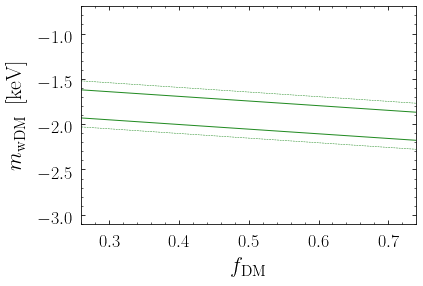

In [186]:
fshr.plot_fisher([fshr.fshr_cls], ["None"], ["forestgreen"], [1])